In [2]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import ssl
from urllib import request, parse, error
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns

### Activity 9

In [3]:
# Checking SSL cert
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE

In [4]:
# making the request and checking if the responce is a successs (code 200)
response = requests.get("https://www.gutenberg.org/browse/scores/top")

def request_check (response):
    return response.status_code==200

print(f"Connection success:  {request_check(response)}")

Connection success:  True


In [5]:
# sending response to BS obj
html = response.content.decode(response.encoding)
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# getting list of all hrefs

links = []
for link in soup.find_all("a"):
    links.append(link.get("href"))
print(links[:50])

['/', '/about/', '/about/', '/policy/collection_development.html', '/about/contact_information.html', '/about/background/', '/policy/permission.html', '/policy/privacy_policy.html', '/policy/terms_of_use.html', '/ebooks/', '/ebooks/', '/ebooks/bookshelf/', '/browse/scores/top', '/ebooks/offline_catalogs.html', '/help/', '/help/', '/help/copyright.html', '/help/errata.html', '/help/file_formats.html', '/help/faq.html', '/policy/', '/help/public_domain_ebook_submission.html', '/help/submitting_your_own_work.html', '/help/mobile.html', '/attic/', '/donate/', '/donate/', '#books-last1', '#authors-last1', '#books-last7', '#authors-last7', '#books-last30', '#authors-last30', '#books-last1', '#authors-last1', '#books-last7', '#authors-last7', '#books-last30', '#authors-last30', '#books-last1', '#authors-last1', '#books-last7', '#authors-last7', '#books-last30', '#authors-last30', '/ebooks/2641', '/ebooks/145', '/ebooks/37106', '/ebooks/16389', '/ebooks/67979']


In [7]:
# getting index of first book in link of top 100 and slicing the 100 following entries
start = links.index('/ebooks/2641')
top_in_7 = links[start:start+100]

# munging all of the entries to only include file numbers
for i, book in enumerate(top_in_7):
    entries = re.findall(r"[0-9]+", book)
    if len(entries) == 1:
        top_in_7[i] = entries[0]
print(f"file number for top 100:\n{top_in_7}")

file number for top 100:
['2641', '145', '37106', '16389', '67979', '100', '6761', '2701', '394', '2160', '4085', '6593', '5197', '1259', '84', '1342', '41', '345', '25344', '1661', '11', '20228', '98', '174', '1952', '46', '2542', '43', '64317', '1080', '2591', '4300', '1400', '1232', '76', '1260', '844', '1184', '5200', '2600', '2554', '74', '6130', '408', '23', '205', '158', '120', '30254', '42108', '43453', '2148', '219', '3207', '69252', '45', '28054', '996', '69260', '1727', '33283', '135', '768', '58585', '4734', '786', '514', '69257', '2814', '69254', '779', '16328', '1399', '1497', '5740', '27827', '2852', '16', '236', '7370', '55', '730', '244', '203', '20203', '48320', '36', '42324', '4363', '3600', '766', '69251', '1998', '69250', '8492', '15399', '829', '69264', '69253', '10']


In [8]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-10-31
last 7 days979941
last 30 days6610714



Top 100 EBooks yesterday
Top 

In [12]:
# I used the name of the first book in the list because of a few inconsistencies with the site at the time of publication and now.
# Also, I kept the author name in the title because I couldn't find a clean way to only extract the title just using match and span.
book_names = []

start = soup.text.splitlines().index("A Room with a View by E. M.  Forster (24811)")
for i, book in enumerate(soup.text.splitlines()[start:start+100]):
    book_i1, book_i2 = re.match('.* \(', book).span()
    book = book[book_i1:book_i2-2]
    book_names.append(book)
    print(book)

A Room with a View by E. M.  Forster
Middlemarch by George Eliot
Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott
The Enchanted April by Elizabeth Von Arnim
The Blue Castle: a novel by L. M.  Montgomery
The Complete Works of William Shakespeare by William Shakespeare
The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett
Moby Dick; Or, The Whale by Herman Melville
Cranford by Elizabeth Cleghorn Gaskell
The Expedition of Humphry Clinker by T.  Smollett
The Adventures of Roderick Random by T.  Smollett
History of Tom Jones, a Foundling by Henry Fielding
My Life — Volume 1 by Richard Wagner
Twenty Years After by Alexandre Dumas
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
Pride and Prejudice by Jane Austen
The Legend of Sleepy Hollow by Washington Irving
Dracula by Bram Stoker
The Scarlet Letter by Nathaniel Hawthorne
The Adventures of Sherlock Holmes by Arthur Conan Doyle
Alice's Adventures in Wonderland by Lewis Carroll
Noli Me Tangere

### Activity 10

In [13]:
# Opens API key file and loads the key for the OMBDapi
with open('APIkeys.json') as file:
    keys = json.load(file)
    omdbapi = keys["OMDBapi"]

omdb_portal = "http://www.omdbapi.com/?"

apikey = f"&apikey={omdbapi}"

In [14]:
# function for printing info from recieved JSON file
def print_json(json):
    movie_info_list = ["Title","Year","Rated","Released","Runtime","Genre","Director","Writer","Actors","Plot","Language","Country","Awards","Ratings", "Metascore","imdbRating","imdbVotes","imdbID"]
    
    print("-"*50)
    for info in movie_info_list:
        print(f"{info}:  {json[info]}")
    print("-"*50)

# saves poster from JSON file to local storage
def save_poster(json):
    import os
    title = json["Title"]
    poster_url = json["Poster"]

    file_extension = poster_url.split('.')[-1]
    save_location = os.getcwd()+'\\'+'Posters'+'\\'
    poster = request.urlopen(poster_url).read()

    if not os.path.isdir(save_location):
        os.mkdir(save_location)

    filename = save_location + str(title) + '.' + file_extension
    with open(filename, 'wb') as file:
        file.write(poster)

# search function, makes request to OMDBapi and calls other two functions
def search_movie(title):
    try:
        url = omdb_portal + parse.urlencode({'t':str(title)})+apikey
        
        print(f"calling data for {title}")
        print(url)

        response = request.urlopen(url)
        data = response.read()
        json_data = json.loads(data)
        
        if json_data['Response'] == 'True':
            print_json(json_data)
            if json_data['Poster'] != 'N/A':
                save_poster(json_data)
        else:
            print(f"Encountered error in JSON {json_data['Error']}")

    except error.URLError as e:
        print(f"Error Connecting: {e.reason}")

In [15]:
search_movie("Titanic")

calling data for Titanic
http://www.omdbapi.com/?t=Titanic&apikey=aa682df
--------------------------------------------------
Title:  Titanic
Year:  1997
Rated:  PG-13
Released:  19 Dec 1997
Runtime:  194 min
Genre:  Drama, Romance
Director:  James Cameron
Writer:  James Cameron
Actors:  Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot:  A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language:  English, Swedish, Italian, French
Country:  United States, Mexico
Awards:  Won 11 Oscars. 125 wins & 83 nominations total
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore:  75
imdbRating:  7.9
imdbVotes:  1,164,233
imdbID:  tt0120338
--------------------------------------------------


In [16]:
search_movie("Random Error")

calling data for Random Error
http://www.omdbapi.com/?t=Random+Error&apikey=aa682df
Encountered error in JSON Movie not found!


### Part 3

In [10]:
import tweepy
import pprint
# security keys from twitter API, only really need bearer key for this though
with open('APIkeys.json') as file:
    keys = json.load(file)
    twt_api = keys["Twitter API"]
    twt_api_sec = keys["Twitter API Secret"]
    twt_token = keys["Twitter Access Token"]
    twt_token_sec = keys["Twitter Access Token Secret"]
    twt_bearer = keys["Twitter Bearer Token"]

# creates client object using API and sends query to IP
client = tweepy.Client(twt_bearer)
query = "Data Science"
results = client.search_recent_tweets(query = query)
print(results)

Response(data=[<Tweet id=1589392085907836928 text='RT @kaveri59872487: I teach patho to nursing students. Every semester since spring of 2020, I have taught about Covid.  And every semester…'>, <Tweet id=1589392061996093442 text='RT @kaveri59872487: I teach patho to nursing students. Every semester since spring of 2020, I have taught about Covid.  And every semester…'>, <Tweet id=1589392049731563520 text='RT @kaveri59872487: I teach patho to nursing students. Every semester since spring of 2020, I have taught about Covid.  And every semester…'>, <Tweet id=1589391960896589824 text='RT @kaveri59872487: I teach patho to nursing students. Every semester since spring of 2020, I have taught about Covid.  And every semester…'>, <Tweet id=1589391847776210944 text='RT @kaveri59872487: I teach patho to nursing students. Every semester since spring of 2020, I have taught about Covid.  And every semester…'>, <Tweet id=1589391821784117248 text="@sportingshina I'm not in to any business I'm a studen

### Part 4

In [ ]:
# Used a used car dataset from Kaggle to avoid having to do too muc data prep
# https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog?select=cars.csv
used_car_df = pd.read_csv("cars.csv")
used_car_df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


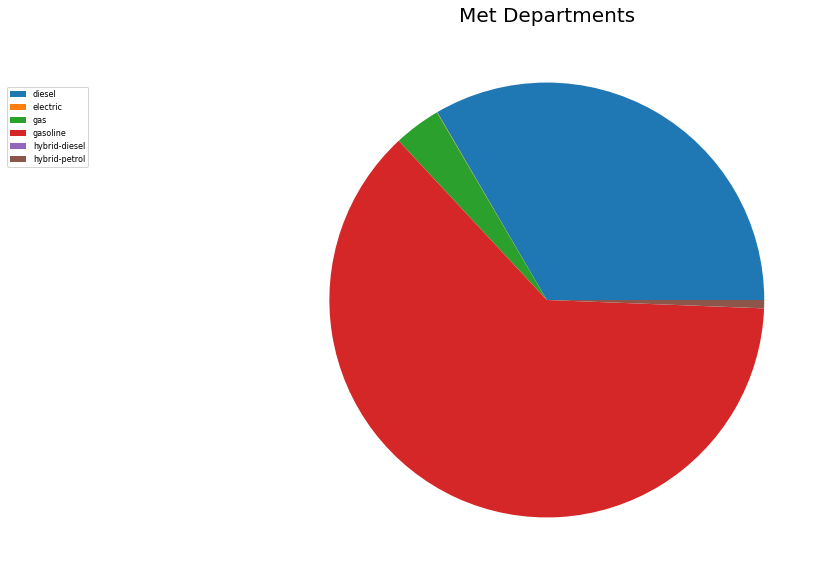

In [ ]:

plt.rcParams["figure.figsize"] = (25,10)
patches, _ = plt.pie(used_car_df.groupby('engine_fuel')["manufacturer_name"].count(), labeldistance=1.5)
plt.legend(patches, used_car_df.groupby('engine_fuel')["manufacturer_name"].count().index, loc='upper left', bbox_to_anchor=[-0.5, 0.90], fontsize=8)
plt.title("Met Departments", fontdict={'fontsize': 20})
plt.show()

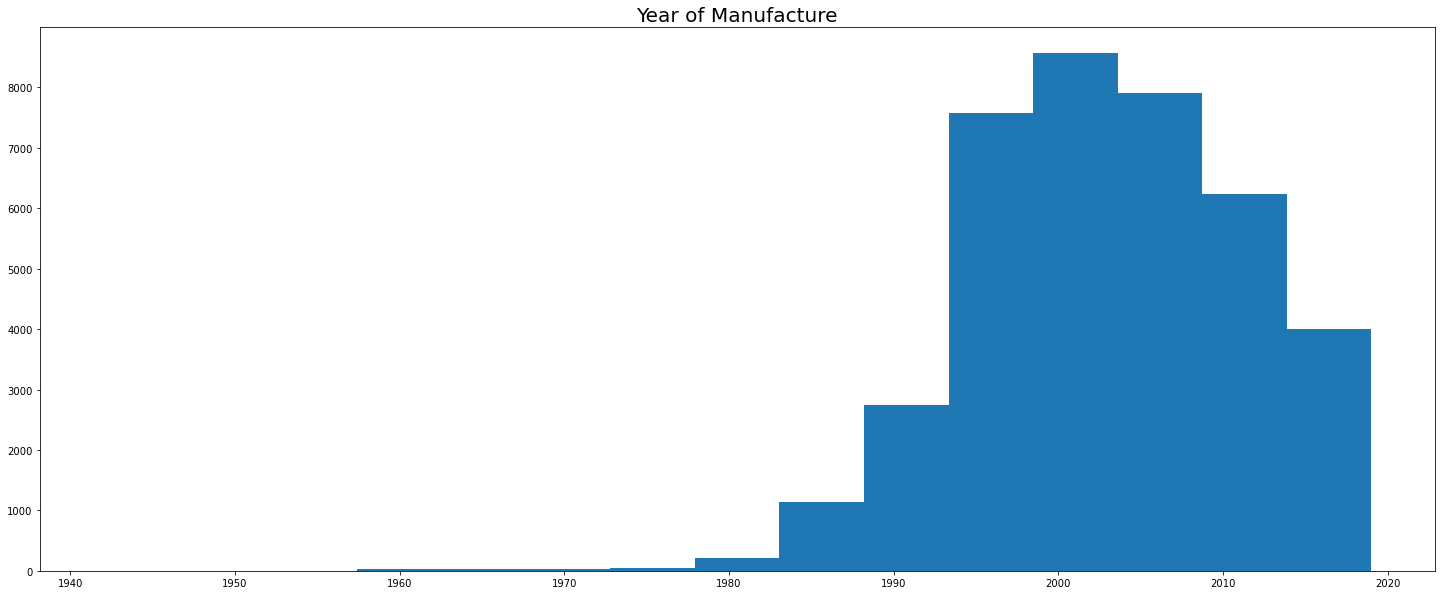

In [ ]:
plt.hist(used_car_df.year_produced, bins=15)
plt.title("Year of Manufacture", fontdict={'fontsize': 20})
plt.show()

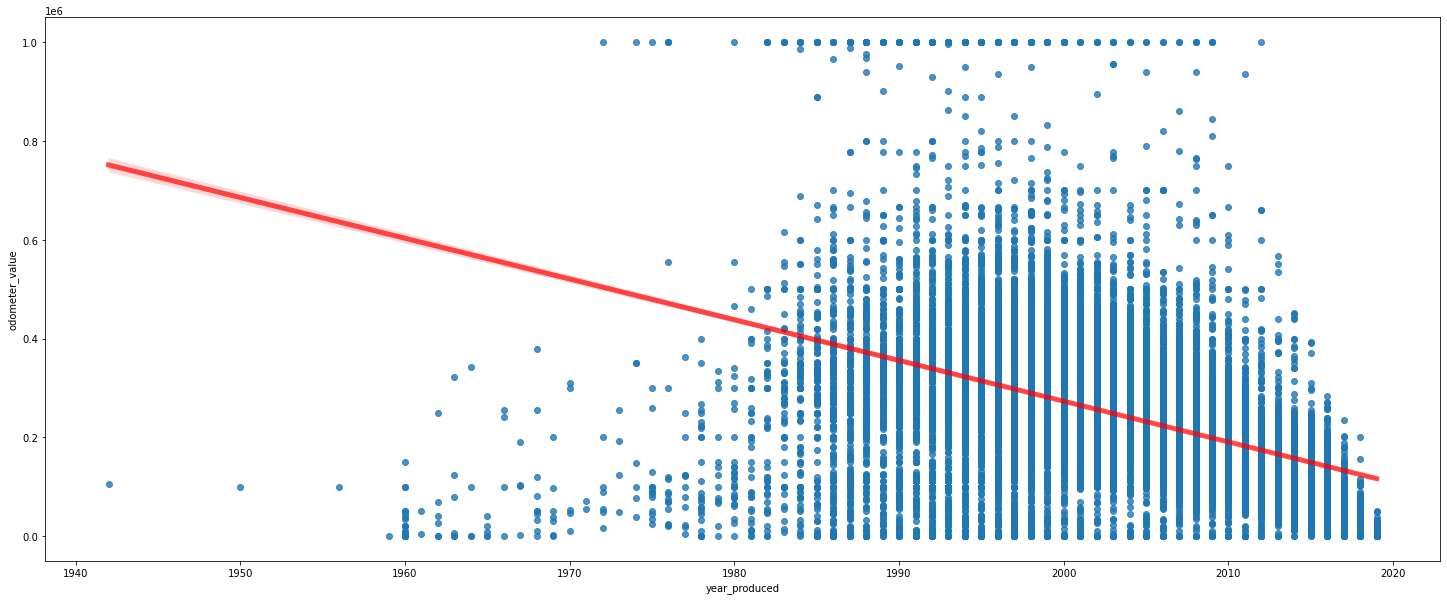

In [ ]:
sns.regplot(x=used_car_df.year_produced, y=used_car_df.odometer_value, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

In [ ]:
used_car_df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')